In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/devices-specifications-dataset/train - train.csv
/kaggle/input/devices-specifications-dataset/test - test.csv


In [2]:
!pip install optuna

   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   -- ------------------------------------- 20.5/380.1 kB ? eta -:--:--
   -------- ------------------------------ 81.9/380.1 kB 919.0 kB/s eta 0:00:01
   ---------------- ----------------------- 153.6/380.1 kB 1.1 MB/s eta 0:00:01
   ------------------------ --------------- 235.5/380.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 327.7/380.1 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  378.9/380.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 380.1/380.1 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.4 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/233.4 kB 3.2 MB/s eta 0:00:01
   ------------------------ --------------- 143.4/233.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 233.4/233.4 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import optuna
import pickle


c:\Users\NIRA\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# train_df=pd.read_csv("../input/devices-specifications-dataset/train - train.csv")
# test_df=pd.read_csv("../input/devices-specifications-dataset/test - test.csv")
train_df=pd.read_csv("./train - train.csv")
test_df=pd.read_csv("./test - test.csv")

In [5]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [6]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
summary_stats = train_df.describe()
summary_stats


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
test_df.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

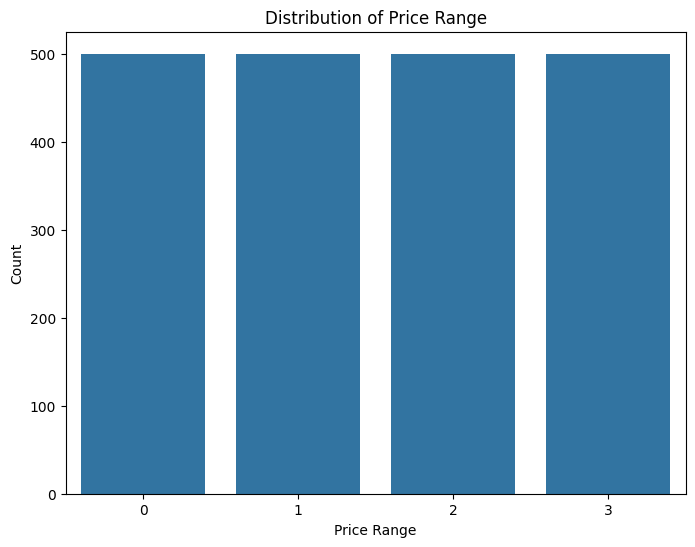

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train_df)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

The target variable **price_range** has an even distribution across its categories, indicating a balanced dataset for classification tasks.

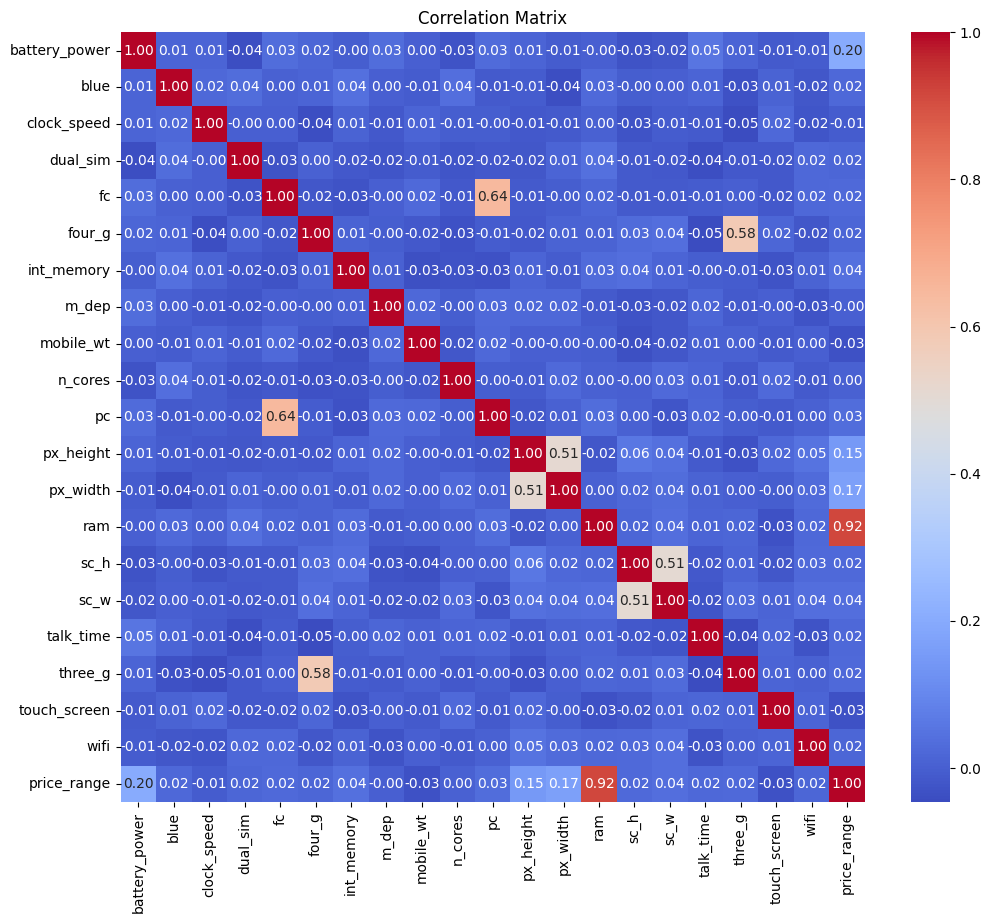

In [11]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Features like ram, px_height, px_width, battery_power have positive correlations with price_range and are likely to be significant predictors in a machine learning model. These features will aid in feature selection and engineering for better model performance.


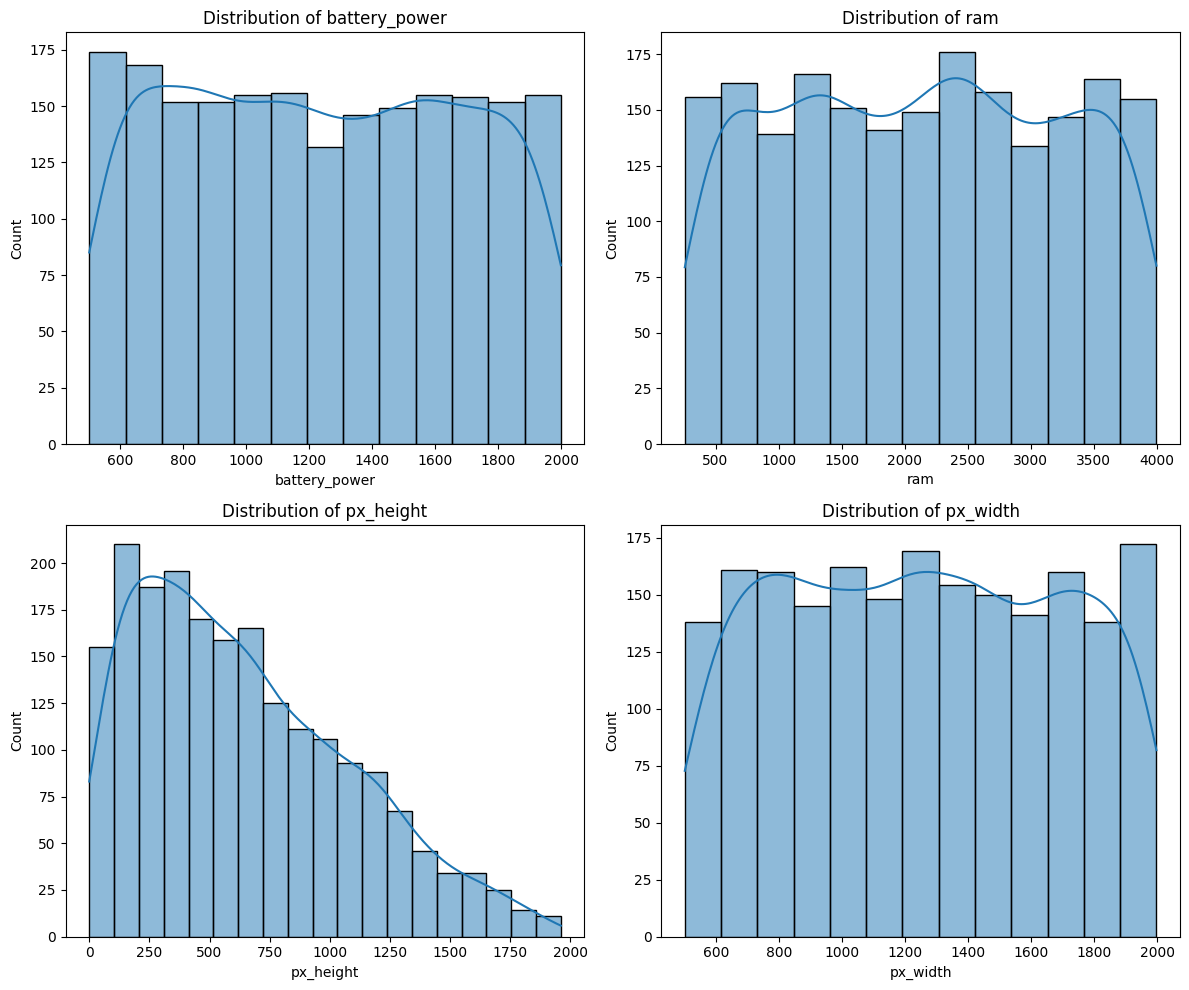

In [12]:
num_features = ['battery_power', 'ram', 'px_height', 'px_width']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


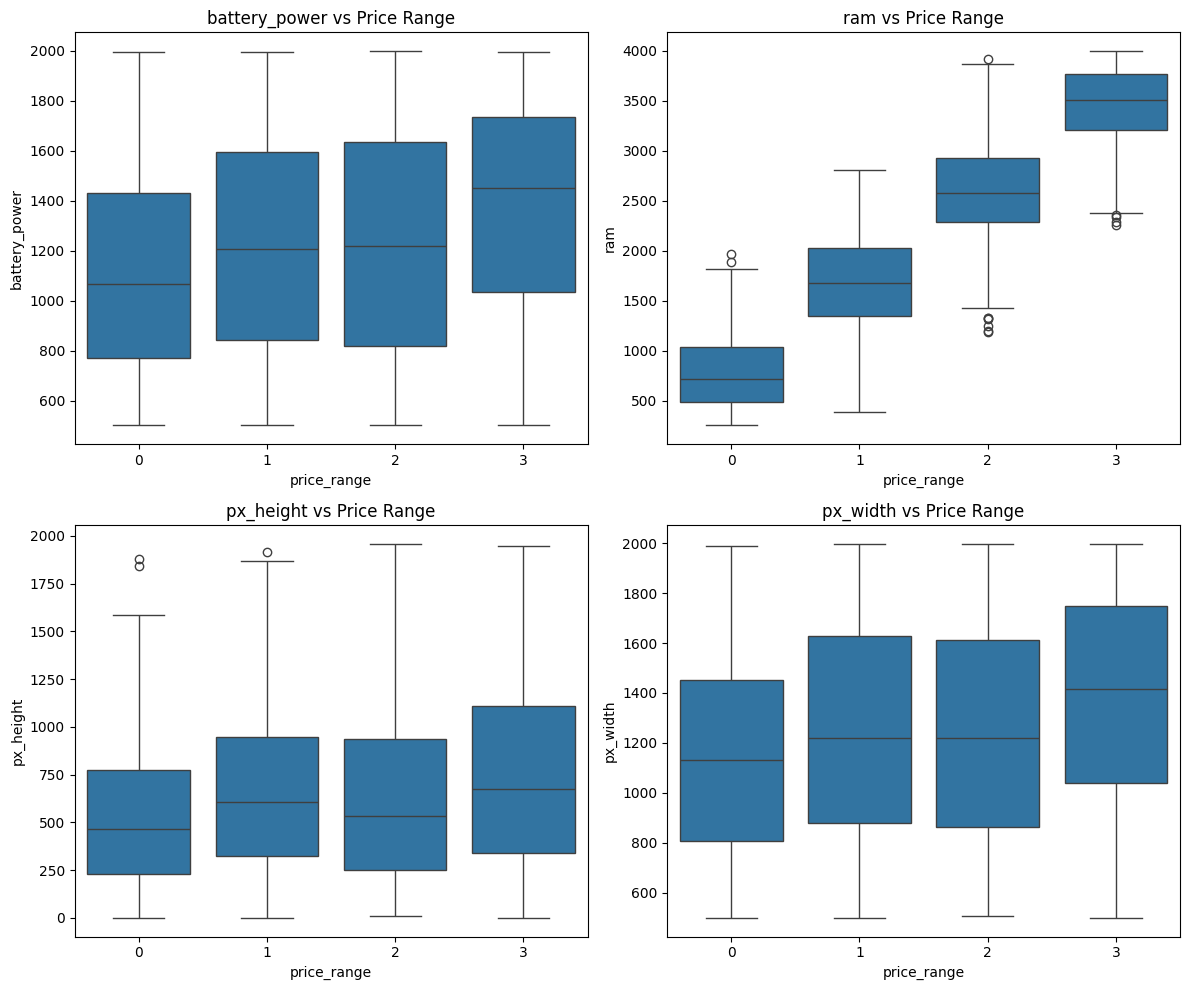

In [13]:
# Plot relationship between key features and price range
plt.figure(figsize=(12, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='price_range', y=feature, data=train_df)
    plt.title(f'{feature} vs Price Range')
plt.tight_layout()
plt.show()


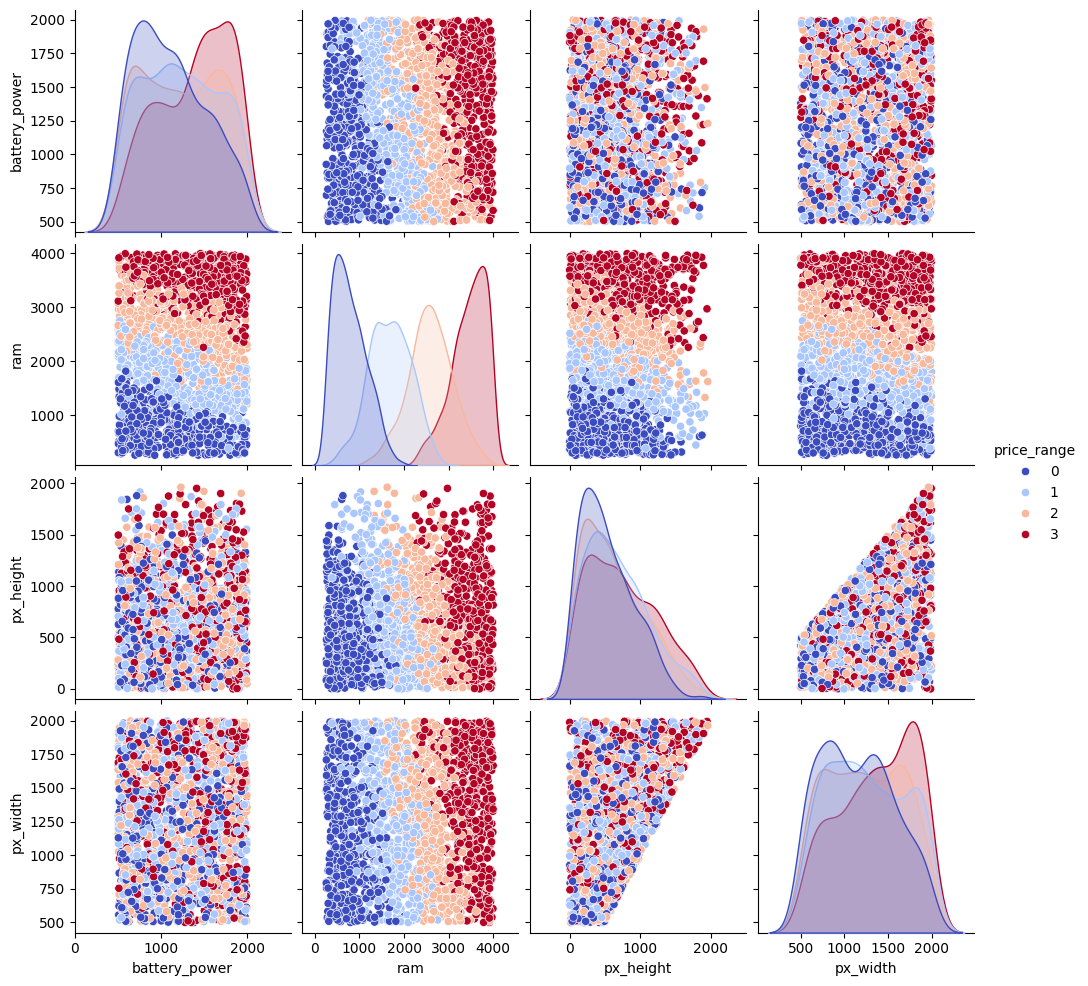

In [14]:
# Pair plots for numerical features
sns.pairplot(train_df[num_features + ['price_range']], hue='price_range', palette='coolwarm')
plt.show()


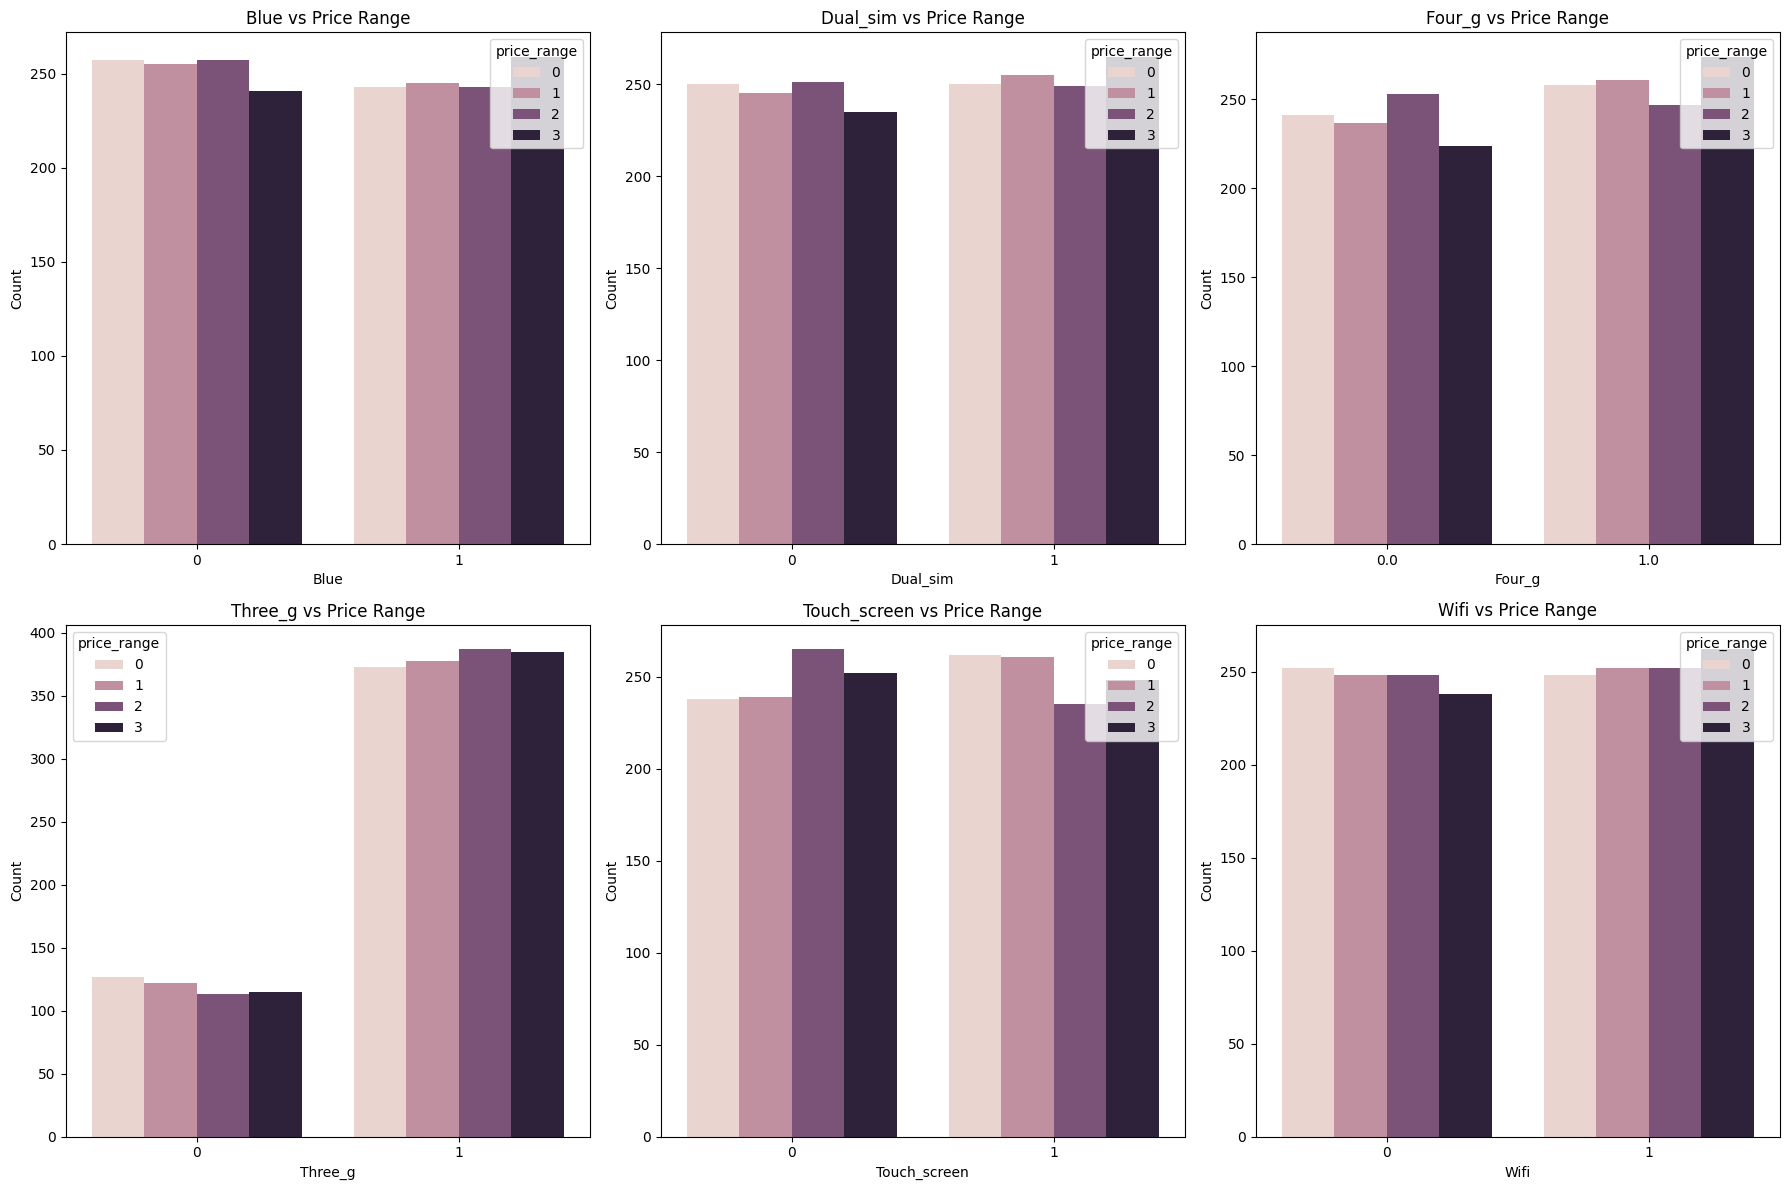

In [15]:
cat_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, hue='price_range', data=train_df)
    plt.title(f'{feature.capitalize()} vs Price Range')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [16]:
imputer = SimpleImputer(strategy='mean')

train_df_imputed_array = imputer.fit_transform(train_df)
print(train_df_imputed_array)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 3.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 3.000e+00]]


In [17]:
train_df_imputed = pd.DataFrame(train_df_imputed_array, columns=train_df.columns)
# print(train_df_imputed)

## Feature Engineering


In [18]:
train_df_imputed['ram_per_px'] = train_df_imputed['ram'] / (train_df_imputed['px_height'] + train_df_imputed['px_width'])

In [19]:
print(train_df_imputed['ram_per_px'])

0       3.284794
1       0.909437
2       0.873783
3       0.922385
4       0.583058
          ...   
1995    0.214653
1996    0.705556
1997    1.222800
1998    0.863817
1999    3.168149
Name: ram_per_px, Length: 2000, dtype: float64


In [20]:
train_df_imputed['battery_screen']= train_df_imputed['battery_power']*(train_df_imputed['px_height'] + train_df_imputed['px_width'])

In [21]:
train_df_imputed['battery_screen'].head()

0     653392.0
1    2953753.0
2    1677177.0
3    1846230.0
4    4406820.0
Name: battery_screen, dtype: float64

In [22]:
test_df['ram_per_px'] = test_df['ram'] / (test_df['px_height'] + test_df['px_width'])
test_df['battery_screen']= test_df['battery_power']*(test_df['px_height'] + test_df['px_width'])

In [23]:
num_features = ['battery_screen','ram','battery_power','px_height','px_width','ram_per_px']

In [24]:
base_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']




In [25]:

# Define all features including interaction features
all_features = base_features + ['ram_per_px', 'battery_screen']

We have selected the numerical features based on their potential impact on the target variable(price_range). These features were chosen because they exhibited significant correlations with the target variable during our exploratory data analysis (EDA).

In [26]:
scaler = StandardScaler()
train_df_imputed[num_features]=scaler.fit_transform(train_df_imputed[num_features])
test_df[num_features] = scaler.transform(test_df[num_features])


In [30]:
train_df_imputed.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ram_per_px,battery_screen
0,-0.902597,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,0.391659,9.0,7.0,19.0,0.0,0.0,1.0,1.0,1.926265,-1.291373
1,-0.495139,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,0.467272,17.0,3.0,7.0,1.0,1.0,0.0,2.0,-0.438338,0.460572
2,-1.537686,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,0.441453,11.0,2.0,9.0,1.0,1.0,0.0,2.0,-0.473830,-0.511663
3,-1.419319,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,0.594525,16.0,8.0,11.0,1.0,0.0,0.0,2.0,-0.425448,-0.382913
4,1.325906,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,-0.657712,8.0,2.0,15.0,1.0,1.0,0.0,1.0,-0.763239,1.567221


In [31]:
X = train_df_imputed.drop(columns=['price_range'])
y = train_df_imputed['price_range']

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,ram_per_px,battery_screen
968,1.558089,0.0,0.5,1.0,7.0,0.0,46.0,0.5,191.0,1.0,...,1.175182,-0.585787,10.0,9.0,3.0,1.0,1.0,1.0,-0.756857,1.910456
240,-1.378345,1.0,2.2,0.0,0.0,1.0,49.0,0.1,139.0,8.0,...,-0.560814,1.323921,11.0,1.0,16.0,1.0,1.0,1.0,0.960557,-1.047539
819,-0.005733,0.0,0.9,1.0,2.0,1.0,57.0,0.1,188.0,1.0,...,-1.023747,-0.662323,14.0,12.0,20.0,1.0,0.0,1.0,-0.288126,-0.540787
692,-1.041452,0.0,1.1,0.0,2.0,0.0,38.0,0.4,198.0,5.0,...,0.978436,1.275970,13.0,8.0,5.0,0.0,0.0,1.0,0.421822,-0.612467
420,0.495054,1.0,0.5,1.0,7.0,0.0,7.0,0.4,105.0,5.0,...,-0.340921,-0.495420,6.0,5.0,20.0,1.0,0.0,1.0,-0.523826,0.347824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.676457,1.0,1.9,1.0,2.0,0.0,31.0,0.9,151.0,1.0,...,0.823353,0.827821,13.0,5.0,19.0,0.0,0.0,1.0,-0.080720,1.793895
1294,-1.478503,1.0,0.5,0.0,1.0,1.0,59.0,0.7,146.0,8.0,...,1.404334,-1.625015,16.0,10.0,6.0,1.0,1.0,1.0,-1.205957,-0.615060
860,1.344116,1.0,0.5,0.0,0.0,1.0,15.0,0.4,160.0,5.0,...,0.036368,-0.040815,16.0,11.0,12.0,1.0,0.0,1.0,-0.306291,0.991351
1459,1.567194,0.0,0.9,1.0,3.0,0.0,11.0,0.4,190.0,8.0,...,0.589573,0.730076,16.0,11.0,18.0,0.0,1.0,1.0,0.109922,1.141793


## Random_Forest Model 

* We chose Random Forest for its robustness and high accuracy across various datasets. It provides feature importance scores, which help in understanding which features contribute the most to the predictions. Additionally, Random Forest mitigates overfitting and improves generalizability.


In [29]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_model.predict(X_val)

In [32]:
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9275


In [33]:
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       105
         1.0       0.89      0.93      0.91        91
         2.0       0.88      0.91      0.89        92
         3.0       0.97      0.91      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



* The model performs well across all classes, with high precision, recall, and F1-scores.
* Class 3.0 has the highest precision (0.97), indicating very few false positives.
* Class 1.0 has a slightly lower precision and recall compared to the other classes, but still performs well overall.

## XGBOOST MODEL 

We chose XGBoost for its excellent performance and faster training times compared to traditional Gradient Boosting implementations. XGBoost includes regularization parameters to control overfitting, providing more flexibility in tuning the model. It can handle missing values, making it robust and efficient. Additionally, XGBoost supports parallel processing, which significantly speeds up the training process. 


In [34]:
xgb_model= XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
y_pred = xgb_model.predict(X_val)


In [36]:
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.945


In [37]:
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       105
         1.0       0.91      0.97      0.94        91
         2.0       0.95      0.88      0.92        92
         3.0       0.95      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



* Class 3.0 has high precision (0.95) and recall (0.96), indicating a good balance between identifying true positives and avoiding false positives.
* Class 2.0 has slightly lower recall (0.88) compared to other classes, but still maintains a good balance overall.

## Hyperparameter Tuning with Optuna


* We chose to use Optuna for hyperparameter tuning due to its efficiency and effectiveness in searching for optimal hyperparameters. Optuna uses techniques like Bayesian optimization to explore the hyperparameter space and find the best combination that maximizes the model's performance.


In [38]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'objective': 'multi:softmax',
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    
    xgb_model= XGBClassifier(**param)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-06-17 09:51:16,620] A new study created in memory with name: no-name-0da19f80-5b23-465b-a310-7a9225d5f0a8
[I 2024-06-17 09:51:17,496] Trial 0 finished with value: 0.9375 and parameters: {'n_estimators': 117, 'learning_rate': 0.11184989394185522, 'max_depth': 6, 'colsample_bytree': 0.9837191613872884}. Best is trial 0 with value: 0.9375.
[I 2024-06-17 09:51:18,285] Trial 1 finished with value: 0.935 and parameters: {'n_estimators': 190, 'learning_rate': 0.2610543137350781, 'max_depth': 3, 'colsample_bytree': 0.7595640914893365}. Best is trial 0 with value: 0.9375.
[I 2024-06-17 09:51:19,010] Trial 2 finished with value: 0.94 and parameters: {'n_estimators': 101, 'learning_rate': 0.1070114716263532, 'max_depth': 4, 'colsample_bytree': 0.8424669337615969}. Best is trial 2 with value: 0.94.
[I 2024-06-17 09:51:20,079] Trial 3 finished with value: 0.9425 and parameters: {'n_estimators': 152, 'learning_rate': 0.17124046795709294, 'max_depth': 5, 'colsample_bytree': 0.6611747657750329

In [40]:
best_trial = study.best_trial
print(f"Best trial: Value: {best_trial.value}")
print("Best hyperparameters: ", best_trial.params)

Best trial: Value: 0.9475
Best hyperparameters:  {'n_estimators': 55, 'learning_rate': 0.2782504088512786, 'max_depth': 8, 'colsample_bytree': 0.6230597315428195}


In [41]:
best_params = best_trial.params

In [42]:
xgb_model= XGBClassifier(**best_params)

In [43]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6230597315428195, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2782504088512786,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=55, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
y_pred = xgb_model.predict(X_val)

In [45]:
accuracy= accuracy_score(y_val, y_pred)

print('Accuracy :',accuracy)

Accuracy : 0.9475


In [46]:
report = classification_report(y_val,y_pred)

print('classification_report :',report)

classification_report :               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       105
         1.0       0.93      0.97      0.95        91
         2.0       0.94      0.90      0.92        92
         3.0       0.95      0.96      0.95       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



* The model demonstrates strong performance across all classes, with high precision, recall, and F1-scores.
* Class 0.0 and Class 3.0 have particularly high precision and recall, indicating very few false positives and false negatives.
* Class 2.0 has slightly lower recall (0.92) compared to other classes but still maintains a high precision and overall performance.

In [49]:
with open('xgb_model1.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

In [50]:
with open('scaler.pkl1', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [27]:
with open('features.pkl', 'wb') as features_file:
    pickle.dump(all_features, features_file)

In [29]:
all_features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'ram_per_px',
 'battery_screen']